# Linear Model for Regression
#### Generalized Predict Function
- $\hat{y} = w[0] \times x[0] + w[1] \times x[1] + ... + w[p] \times x[p] + b$
- $\hat{y}$ is predict value from model
- $x[0]$ to $x[p]$ is features (p+1 features exist)
- $w[0]$ to $w[p]$ and $b$ is the parameter that the model study

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


# Regression sample
- If there is only one feature, we describe it using a line.
- If there are two features, we describe it using a plane.
- If there are more than two features, the line become a hyperplane.
- More features -> better Linear Model

w[0]: 0.393906  b: -0.031804


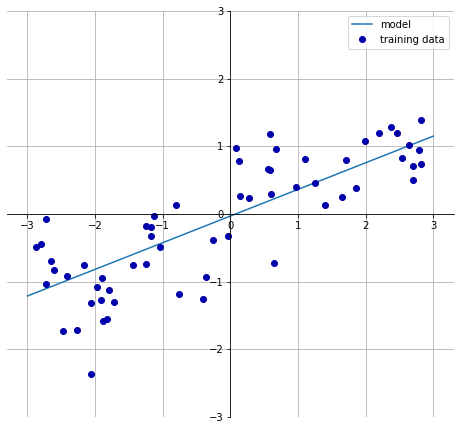

In [2]:
mglearn.plots.plot_linear_regression_wave()

# 1. Linear Regression
- Try to find the minimum value of Mean Squared Error between predict and training set's y val.
- $LOSS = MSE = {1 \over n}\sum_{i=1}^{n}(y_i - \hat y)^2$
- Use Gradient-descent algorithm to minimize MSE.

#### Example 1: Wave datasets

In [3]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [4]:
print("lr.coef_:", lr.coef_) # parameter w which means slope if there is one feature.
                             # If there are more feature, there wil be more coefficient.
print("lr.intercept_:", lr.intercept_) # parameter b which is the intercept. 
                                       # intercept is only one float value.

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [5]:
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))
# Score is not good for both training and test set -> Underfitting
# We need more features.(this dataset only have one feature...)

training set score: 0.67
test set score: 0.66


#### Example 2: Extended Boson datasets 

In [6]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print("training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))
# Score is not good for test set but good score for training set -> Overfitting to training set.
# We need to make our model less complex.(this dataset has too many features...)

training set score: 0.95
test set score: 0.61


# 2. Ridge Regression
- Add penalty to make all $w[i]$ is close to 0. L2 Regularization.
- Try to find the minimum value of Mean Squared Error between predict and training set's y val.
- $LOSS = MSE + penalty = {1 \over n}\sum_{i=1}^{n}(y_i - \hat y)^2 + \alpha \sum_{i=1}^{n}w_i^2$
- Control the model using $\alpha$.
- When $\alpha$ is close to 0, similar model as linear regression.
- When $\alpha$ is bigger, most of $w[i]$ is close to 0.

#### Example 1: Extended Boston datasets ($\alpha$ = 1(default))

In [8]:
from sklearn.linear_model import Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [9]:
print("training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))
# Better test set score than linear regression -> better model


training set score: 0.89
test set score: 0.75


#### Example 2: Extended Boston datasets ($\alpha$ = 10)

In [10]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
# More generalize, but less fitting.

training set score: 0.79
test set score: 0.64


#### Example 3: Extended Boston datasets ($\alpha$ = 0.1)

In [11]:
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)
print("training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

training set score: 0.93
test set score: 0.77


#### Analyze How alpha Work
- Linear Regession biggest size of coef > alph=0.1 > alpha=1 > alpha=10

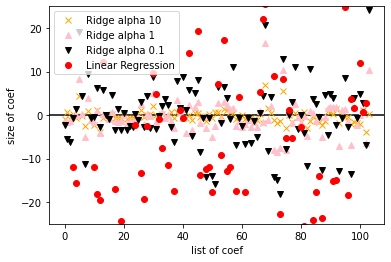

In [12]:
plt.plot(ridge10.coef_, "x", label="Ridge alpha 10",color="orange")
plt.plot(ridge.coef_, "^", label="Ridge alpha 1", color="pink")
plt.plot(ridge01.coef_, "v", label="Ridge alpha 0.1", color="black")
plt.xlabel("list of coef")
plt.ylabel("size of coef")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.plot(lr.coef_, "o", label="Linear Regression", color="red")
plt.legend()

#### Analyze How Sample Size Work (Learning Curve)
- When there is small training set, Ride has better test score.
- When there is bigger training set, Linear Regression almost catch up.

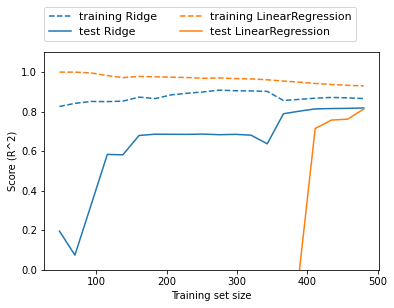

In [13]:
mglearn.plots.plot_ridge_n_samples()

# 3. Lasso Regression
- Add penalty to make some $w[i]$ is 0. L1 Regularization
- Automatically select feature.
- Try to find the minimum value of Mean Squared Error between predict and training set's y val.
- $LOSS = MSE + penalty = {1 \over n}\sum_{i=1}^{n}(y_i - \hat y)^2 + \alpha \sum_{i=1}^{n}|w_i|$
- Control the model using $\alpha$.
- When $\alpha$ is close to 0, similar model as linear regression.
- When $\alpha$ is bigger, most of $w[i]$ is 0.

#### Example 1: Extended Boston datasets (alpha = 1(default))

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("used feature:", np.sum(lasso.coef_!=0))
# We had 104 features but lasso only use 4 features. -> underfitting
# low score model. Let's change alpha!

training set score: 0.29
test set score: 0.21
used feature: 4


#### Example 2: Extended Boston datasets (alpha = 0.01)

In [15]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("used feature:", np.sum(lasso001.coef_!=0))
# better than example 1 -> it looks ok

training set score: 0.90
test set score: 0.77
used feature: 33


#### Example 3: Extended Boston datasets (alpha = 0.0001)

In [16]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("used feature:", np.sum(lasso00001.coef_!=0))
# Too many features!! -> Overfitting

training set score: 0.95
test set score: 0.64
used feature: 96


#### Analyze How alpha Work
- Lasso: 
    - when alpha = 1, most of coef is 0.
    - when alpha = 0.0001, most of coef is far away from 0.

Text(0, 0.5, 'size of coef')

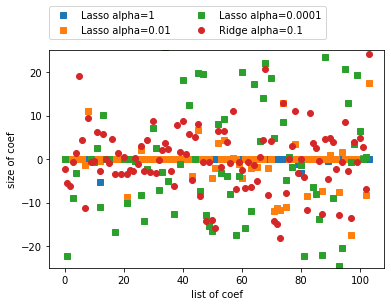

In [17]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 's', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("list of coef")
plt.ylabel("size of coef")

# More to Do
- In scikit-learn there exist ElasticNet.
- ElasticNet = combination of Ridge and Lasso.